<a href="https://colab.research.google.com/github/buntys2010/AV-LTFS-Data-Science-FinHack-ML-Hackathon/blob/master/LTFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LTFS Data Science FinHack ( ML Hackathon)

![alt text](content/LTFS.png)

# L&T Financial Services & Analytics Vidhya presents ‘DataScience FinHack’.

In this FinHack, you will develop a model for our most common but real challenge ‘Loan Default Prediction’ & also, get a feel of our business!

If your solution adds good value to our organization, take it from us, Sky is the limit for you!

# Problem Statement

# Vehicle Loan Default Prediction

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:


1.   Loanee Information (Demographic data like age, income, Identity proof etc.)
2.   Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.)
3.   Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

# Data Description

*   train.zip contains train.csv and data_dictionary.csv.
*   train.csv contains the training data with details on loan as described in the last section
*   data_dictionary.csv contains a brief description on each variable provided in the training and test set.
*   data_dictionary.csv contains a brief description on each variable provided in the training and test set.
*   test.csv contains details of all customers and loans for which the participants are to submit probability of default.
*  sample_submission.csv contains the submission format for the predictions against the test set. A single csv needs to be submitted as a solution.

# Evaluation Metric

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

# Public and Private Split

Test data is further randomly divided into Public (25%) and Private (75%) data. Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over.

## Read Data

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import lightgbm as lgb
import xgboost as xgb
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras import Sequential
from keras import layers
from keras import backend as K
from keras.layers.core import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.constraints import max_norm
import tensorflow as tf
import keras
from lightgbm import LGBMClassifier

Using TensorFlow backend.


In [0]:
!unzip "../content/ltfs-hackathon.zip"

Archive:  ../content/ltfs-hackathon.zip
  inflating: test_bqCt9Pv.csv        
  inflating: sample_submission_24jSKY6.csv  
  inflating: train_aox2Jxw.zip       


In [0]:
!unzip "../content/train_aox2Jxw.zip"

Archive:  ../content/train_aox2Jxw.zip
  inflating: train.csv               
   creating: __MACOSX/
  inflating: __MACOSX/._train.csv    
  inflating: Data Dictionary.xlsx    
  inflating: __MACOSX/._Data Dictionary.xlsx  


In [0]:
train = pd.read_csv("../content/train.csv")
test = pd.read_csv("../content/test_bqCt9Pv.csv")

In [0]:
train.shape

(233154, 41)

In [0]:
test.shape

(112392, 40)

In [0]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


## Reduce Memory



*   Since it was using a lot of memory , to optimize i have reduced the memory. This allows me to run multiple Algo in same notebook and also runs faster



In [0]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [0]:
reduce_mem_usage(train)

Memory usage of properties dataframe is : 72.93185424804688  MB
******************************
Column:  UniqueID
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  disbursed_amount
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  asset_cost
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  ltv
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  branch_id
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  supplier_id
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  manufacturer_id
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Current_pincode_ID
dtype

(        UniqueID  disbursed_amount  asset_cost        ltv  branch_id  \
 0         420825             50578       58400  89.550003         67   
 1         537409             47145       65550  73.230003         67   
 2         417566             53278       61360  89.629997         67   
 3         624493             57513       66113  88.480003         67   
 4         539055             52378       60300  88.389999         67   
 5         518279             54513       61900  89.660004         67   
 6         529269             46349       61500  76.419998         67   
 7         510278             43894       61900  71.889999         67   
 8         490213             53713       61973  89.559998         67   
 9         510980             52603       61300  86.949997         67   
 10        548567             53278       61230  89.830002         67   
 11        486821             64769       74190  89.230003         67   
 12        478647             53278       61330  89

In [0]:
reduce_mem_usage(test)

Memory usage of properties dataframe is : 34.29939270019531  MB
******************************
Column:  UniqueID
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  disbursed_amount
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  asset_cost
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  ltv
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  branch_id
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  supplier_id
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  manufacturer_id
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Current_pincode_ID
dtype

(        UniqueID  disbursed_amount  asset_cost        ltv  branch_id  \
 0         655269             53478       63558  86.540001         67   
 1         723482             55513       63163  89.449997         67   
 2         758529             65282       84320  79.930000         78   
 3         763449             46905       63896  76.580002         78   
 4         708663             51428       63896  86.080002         78   
 5         725530             57657       71211  84.639999         78   
 6         708592             48518       62767  82.849998         78   
 7         714975             48743       63896  81.379997         78   
 8         712795             50295       63896  82.349998         78   
 9         708656             51653       67445  81.550003         78   
 10        712520             47548       63896  79.820000         78   
 11        753695             54659       68781  82.730003         78   
 12        708646             48518       63896  81

## Change PERFORM_CNS.SCORE.DESCRIPTION column

In [0]:
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='No Bureau History Available') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Sufficient History Not Available') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Not Enough Info available on the customer') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: No Activity seen on the customer (Inactive)') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: No Updates available in last 36 months') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Only a Guarantor') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: More than 50 active Accounts found') else x )

In [0]:
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='No Bureau History Available') else x )
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Sufficient History Not Available') else x )
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Not Enough Info available on the customer') else x )
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: No Activity seen on the customer (Inactive)') else x )
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: No Updates available in last 36 months') else x )
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Only a Guarantor') else x )
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: More than 50 active Accounts found') else x )

In [0]:
# New Col Asset cost by disbursed amount

train['Ass_by_Disb'] = train['asset_cost'] / train['disbursed_amount']
test['Ass_by_Disb'] = test['asset_cost'] / test['disbursed_amount']

In [0]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Info             129785
C-Very Low Risk      16045
A-Very Low Risk      14124
D-Very Low Risk      11358
B-Very Low Risk       9201
M-Very High Risk      8776
F-Low Risk            8485
K-High Risk           8277
H-Medium Risk         6855
E-Low Risk            5821
I-Medium Risk         5557
G-Low Risk            3988
J-High Risk           3748
L-Very High Risk      1134
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [0]:
test['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Info             63017
C-Very Low Risk      7825
A-Very Low Risk      7559
D-Very Low Risk      5114
B-Very Low Risk      4495
M-Very High Risk     4032
K-High Risk          3864
F-Low Risk           3691
H-Medium Risk        3287
I-Medium Risk        2703
E-Low Risk           2572
G-Low Risk           1807
J-High Risk          1778
L-Very High Risk      648
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [0]:
# New Colms based on main features 

train['ass_by_ltv'] = train['asset_cost'] / train['ltv']
train['dis_by_ltv'] = train ['disbursed_amount'] / train['ltv']
train['diff_dis_ass'] = train['asset_cost'] - train['disbursed_amount']

test['ass_by_ltv'] = test['asset_cost'] / test['ltv']
test['dis_by_ltv'] = test ['disbursed_amount'] / test['ltv']
test['diff_dis_ass'] = test['asset_cost'] - test['disbursed_amount']

In [0]:
train['Out_EMI'] = train['PRIMARY.INSTAL.AMT'] + train['SEC.INSTAL.AMT']
test['Out_EMI'] = test['PRIMARY.INSTAL.AMT'] + test['SEC.INSTAL.AMT']

In [0]:
train['disbursed_amount_by_total_EMI'] = train['disbursed_amount'] / train['Out_EMI']
test['disbursed_amount_by_total_EMI'] = test['disbursed_amount'] / test['Out_EMI']

train['disbursed_amount_by_PRI_EMI'] = train['disbursed_amount'] / train['PRIMARY.INSTAL.AMT']
test['disbursed_amount_by_PRI_EMI'] = test['disbursed_amount'] / test['PRIMARY.INSTAL.AMT']

train['disbursed_amount_by_SEC_EMI'] = train['disbursed_amount'] / train['SEC.INSTAL.AMT']
test['disbursed_amount_by_SEC_EMI'] = test['disbursed_amount'] / test['SEC.INSTAL.AMT']

## Fill Missing Value of Employment Type

In [0]:
train['Employment.Type']=train['Employment.Type'].fillna('Other')
test['Employment.Type']=test['Employment.Type'].fillna('Other')

## Target Ratio

In [0]:
train['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

## Feature engg

In [0]:
#Since Disbursed amount is always lower then market value, we can calculate Market Value , it didnt had much importance.

train['Market Value'] = (train['disbursed_amount'] / train['ltv']) * 100
test['Market Value'] = (test['disbursed_amount'] / test['ltv']) * 100

In [0]:
train['manufacturer_id']=train['manufacturer_id'].astype(object)
test['manufacturer_id']=test['manufacturer_id'].astype(object)

In [0]:
# Disabled/Closed account 

train['PRI.NO.OF.ACCTS.Deacti'] = train['PRI.NO.OF.ACCTS'] - train['PRI.ACTIVE.ACCTS']
test['PRI.NO.OF.ACCTS.Deacti'] = test['PRI.NO.OF.ACCTS'] - test['PRI.ACTIVE.ACCTS']

In [0]:
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'],format = "%d-%m-%y")
test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'],format = "%d-%m-%y")

train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'],format = "%d-%m-%y")
test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'],format = "%d-%m-%y")

In [0]:
train['age'] =  (train['DisbursalDate'] - train['Date.of.Birth'])
train['age']=train['age']/np.timedelta64(1,'Y')

test['age'] =  (test['DisbursalDate'] - test['Date.of.Birth'])
test['age']=test['age']/np.timedelta64(1,'Y')

In [0]:
train['age']=train['age'].abs()
test['age']=test['age'].abs()

In [0]:
train['Date.of.Birth_year'] = train['Date.of.Birth'].dt.year
#train['Date.of.Birth_day_of_year'] = train['Date.of.Birth'].dt.dayofyear
#train['Date.of.Birth_weekday'] = train['Date.of.Birth'].dt.weekday
#train['Date.of.Birth_week_of_year'] = train['Date.of.Birth'].dt.week
#train['Date.of.Birth_day_of_month'] = train['Date.of.Birth'].dt.day
train['Date.of.Birth_quarter'] = train['Date.of.Birth'].dt.quarter

test['Date.of.Birth_year'] = test['Date.of.Birth'].dt.year
#test['Date.of.Birth_day_of_year'] = test['Date.of.Birth'].dt.dayofyear
#test['Date.of.Birth_weekday'] = test['Date.of.Birth'].dt.weekday
#test['Date.of.Birth_week_of_year'] = test['Date.of.Birth'].dt.week
#test['Date.of.Birth_day_of_month'] = test['Date.of.Birth'].dt.day
test['Date.of.Birth_quarter'] = test['Date.of.Birth'].dt.quarter

In [0]:
train['DisbursalDate_year'] = train['DisbursalDate'].dt.year
#train['DisbursalDate_day_of_year'] = train['DisbursalDate'].dt.dayofyear
#train['DisbursalDate_weekday'] = train['DisbursalDate'].dt.weekday
#train['DisbursalDate_week_of_year'] = train['DisbursalDate'].dt.week
#train['DisbursalDate_day_of_month'] = train['DisbursalDate'].dt.day
train['DisbursalDate_quarter'] = train['DisbursalDate'].dt.quarter

test['DisbursalDate_year'] = test['DisbursalDate'].dt.year
#test['DisbursalDate_day_of_year'] = test['DisbursalDate'].dt.dayofyear
#test['DisbursalDate_weekday'] = test['DisbursalDate'].dt.weekday
#test['DisbursalDate_week_of_year'] = test['DisbursalDate'].dt.week
#test['DisbursalDate_day_of_month'] = test['DisbursalDate'].dt.day
test['DisbursalDate_quarter'] = test['DisbursalDate'].dt.quarter

In [0]:
# Custom Features

train['DB_Diff_year'] = train['DisbursalDate_year'] - train['Date.of.Birth_year']
#train['DB_Diff_day_of_year'] =train['DisbursalDate_day_of_year'] - train['Date.of.Birth_day_of_year']
#train['DB_Diff_weekday'] = train['DisbursalDate_weekday'] -train['Date.of.Birth_weekday']
#train['DB_Diff_week_of_year'] = train['DisbursalDate_week_of_year'] - train['Date.of.Birth_week_of_year']
#train['DB_Diff_day_of_month']  = train['DisbursalDate_day_of_month'] -train['Date.of.Birth_day_of_month']
train['DB_Diff_quarter'] = train['DisbursalDate_quarter'] - train['Date.of.Birth_quarter']


test['DB_Diff_year'] = test['DisbursalDate_year'] - test['Date.of.Birth_year']
#test['DB_Diff_day_of_year'] =test['DisbursalDate_day_of_year'] - test['Date.of.Birth_day_of_year']
#test['DB_Diff_weekday'] = test['DisbursalDate_weekday'] -test['Date.of.Birth_weekday']
#test['DB_Diff_week_of_year'] = test['DisbursalDate_week_of_year'] - test['Date.of.Birth_week_of_year']
#test['DB_Diff_day_of_month']  = test['DisbursalDate_day_of_month'] -test['Date.of.Birth_day_of_month']
test['DB_Diff_quarter'] = test['DisbursalDate_quarter'] - test['Date.of.Birth_quarter']



In [0]:
train = train.drop(['Date.of.Birth','DisbursalDate'],axis=1)
test = test.drop(['Date.of.Birth','DisbursalDate'],axis=1)

In [0]:
# Total EMI out going while appying the loan

train['total_install_amt'] = train['PRIMARY.INSTAL.AMT'] + train['SEC.INSTAL.AMT']
test['total_install_amt'] = test['PRIMARY.INSTAL.AMT'] + test['SEC.INSTAL.AMT']

In [0]:
train['Total.NO.OF.ACCTS'] =  train['PRI.NO.OF.ACCTS'] + train['SEC.NO.OF.ACCTS']
train['Total.PRI.ACTIVE.ACCTS'] =  train['PRI.ACTIVE.ACCTS'] + train['SEC.ACTIVE.ACCTS']
train['Total.CURRENT.BALANCE'] =  train['PRI.CURRENT.BALANCE'] + train['SEC.CURRENT.BALANCE']
train['Total.SANCTIONED.AMOUNT'] =  train['PRI.SANCTIONED.AMOUNT'] + train['SEC.SANCTIONED.AMOUNT']
train['Total.OVERDUE.ACCTS'] =  train['PRI.OVERDUE.ACCTS'] + train['SEC.OVERDUE.ACCTS']
train['Total.DISBURSED.AMOUNT'] =  train['PRI.DISBURSED.AMOUNT'] + train['PRI.DISBURSED.AMOUNT']

In [0]:
test['Total.NO.OF.ACCTS'] =  test['PRI.NO.OF.ACCTS'] + test['SEC.NO.OF.ACCTS']
test['Total.PRI.ACTIVE.ACCTS'] =  test['PRI.ACTIVE.ACCTS'] + test['SEC.ACTIVE.ACCTS']
test['Total.CURRENT.BALANCE'] =  test['PRI.CURRENT.BALANCE'] + test['SEC.CURRENT.BALANCE']
test['Total.SANCTIONED.AMOUNT'] =  test['PRI.SANCTIONED.AMOUNT'] + test['SEC.SANCTIONED.AMOUNT']
test['Total.OVERDUE.ACCTS'] =  test['PRI.OVERDUE.ACCTS'] + test['SEC.OVERDUE.ACCTS']
test['Total.DISBURSED.AMOUNT'] =  test['PRI.DISBURSED.AMOUNT'] + test['PRI.DISBURSED.AMOUNT']

In [0]:
t1=[]
for temp in train['AVERAGE.ACCT.AGE']:
    temp = temp.split()
    yrs = int(temp[0].replace("yrs",""))
    months = int(temp[1].replace("mon",""))
    t2 = yrs * 12 + months
    t1.append(t2)
train['AVERAGE.ACCT.AGE_months']=t1
train = train.drop('AVERAGE.ACCT.AGE',axis=1)

In [0]:
t1=[]
for temp in test['AVERAGE.ACCT.AGE']:
    temp = temp.split()
    yrs = int(temp[0].replace("yrs",""))
    months = int(temp[1].replace("mon",""))
    t2 = yrs * 12 + months
    t1.append(t2)
test['AVERAGE.ACCT.AGE_months']=t1
test = test.drop('AVERAGE.ACCT.AGE',axis=1)

In [0]:
t1=[]
for temp in train['CREDIT.HISTORY.LENGTH']:
    temp = temp.split()
    yrs = int(temp[0].replace("yrs",""))
    months = int(temp[1].replace("mon",""))
    t2 = yrs * 12 + months
    t1.append(t2)
train['CREDIT.HISTORY.LENGTH_months']=t1
train = train.drop('CREDIT.HISTORY.LENGTH',axis=1)

In [0]:
t1=[]
for temp in test['CREDIT.HISTORY.LENGTH']:
    temp = temp.split()
    yrs = int(temp[0].replace("yrs",""))
    months = int(temp[1].replace("mon",""))
    t2 = yrs * 12 + months
    t1.append(t2)
test['CREDIT.HISTORY.LENGTH_months']=t1
test = test.drop('CREDIT.HISTORY.LENGTH',axis=1)

In [0]:
# Since the values are not available , it make sense to keep it as NA rather then 0 
train['PERFORM_CNS.SCORE'] = train['PERFORM_CNS.SCORE'].apply(lambda x:np.nan if x==0 else x)
test['PERFORM_CNS.SCORE'] = test['PERFORM_CNS.SCORE'].apply(lambda x:np.nan if x==0 else x)

In [0]:
# Diff in years 

train['CA_Diff'] = train['CREDIT.HISTORY.LENGTH_months'] -train['AVERAGE.ACCT.AGE_months']
test['CA_Diff'] = test['CREDIT.HISTORY.LENGTH_months'] -test['AVERAGE.ACCT.AGE_months']

In [0]:
train['SEC.NO.OF.ACCTS.Deacti'] = train['SEC.NO.OF.ACCTS'] - train['SEC.ACTIVE.ACCTS']
test['SEC.NO.OF.ACCTS.Deacti'] = test['SEC.NO.OF.ACCTS'] - test['SEC.ACTIVE.ACCTS']

train['ACCTS.IN.LAST.SIX.MONTHS-Diff'] = train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] - train['NEW.ACCTS.IN.LAST.SIX.MONTHS']
test['ACCTS.IN.LAST.SIX.MONTHS-Diff'] = test['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] - test['NEW.ACCTS.IN.LAST.SIX.MONTHS']

In [0]:
# Loan Paid

train['loan_paid_PRI'] = train['PRI.DISBURSED.AMOUNT'] - train['PRI.CURRENT.BALANCE']
train['loan_paid_Sec'] = train['SEC.DISBURSED.AMOUNT'] - train['SEC.CURRENT.BALANCE']

test['loan_paid_PRI'] = test['PRI.DISBURSED.AMOUNT'] - test['PRI.CURRENT.BALANCE']
test['loan_paid_Sec'] = test['SEC.DISBURSED.AMOUNT'] - test['SEC.CURRENT.BALANCE']

## Get Aggrgate Features

I think the best way to analyses the data is using a quick excel pivot table , I have observed that many of the employee had higher percentage of loan default then other employee. It make sense to find out insights about each employee using aggregate data.

This was proved as we had high data importance of this features.

In [0]:
['mean','sum','min','max','median','quantile','mad','std','count','nunique']
ag_cat=['sum', 'mean','count','nunique','min','max']
ag_num=['mean','sum','min','max','median','quantile','mad','std']
agg_func = {
    'disbursed_amount': ag_num,
    'asset_cost':ag_num,
    'ltv':ag_num,
    'Date.of.Birth_year':ag_num,
    #'Date.of.Birth_day_of_month':ag_num,
    'MobileNo_Avl_Flag':ag_cat,
    'Aadhar_flag':ag_cat,
    'PAN_flag':ag_cat,
    'VoterID_flag':ag_cat,
    'Driving_flag':ag_cat,
    'Passport_flag':ag_cat,
    'PERFORM_CNS.SCORE':ag_num,
    'PRI.NO.OF.ACCTS':ag_num,
    'PRI.ACTIVE.ACCTS':ag_num,
    'PRI.OVERDUE.ACCTS':ag_num,
    'PRI.CURRENT.BALANCE':ag_num,
    'PRI.SANCTIONED.AMOUNT':ag_num,
    'PRI.DISBURSED.AMOUNT':ag_num,
    'SEC.NO.OF.ACCTS':ag_num,
    'SEC.ACTIVE.ACCTS':ag_num,
    'SEC.OVERDUE.ACCTS':ag_num,
    'SEC.CURRENT.BALANCE':ag_num,
    'SEC.SANCTIONED.AMOUNT':ag_num,
    'SEC.DISBURSED.AMOUNT':ag_num,
    'PRIMARY.INSTAL.AMT':ag_num,
    'SEC.INSTAL.AMT':ag_num,
    'NEW.ACCTS.IN.LAST.SIX.MONTHS':ag_num,
    'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS':ag_num,
    'AVERAGE.ACCT.AGE_months':ag_num,
    'CREDIT.HISTORY.LENGTH_months':ag_num,
    'NO.OF_INQUIRIES':ag_num,
    'age':ag_num
    }


In [0]:
print(len(agg_func))

31


In [0]:
target = train['loan_default']
train=train.drop('loan_default',axis=1)

In [0]:
train.shape

(233154, 67)

In [0]:
test.shape

(112392, 67)

In [0]:
frames = [train,test]

In [0]:
all_df = pd.concat(frames,join='inner',ignore_index=True)

In [0]:
all_df.shape

(345546, 67)

In [0]:
all_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,Total.SANCTIONED.AMOUNT,Total.OVERDUE.ACCTS,Total.DISBURSED.AMOUNT,AVERAGE.ACCT.AGE_months,CREDIT.HISTORY.LENGTH_months,CA_Diff,SEC.NO.OF.ACCTS.Deacti,ACCTS.IN.LAST.SIX.MONTHS-Diff,loan_paid_PRI,loan_paid_Sec
0,420825,50578,58400,89.550003,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.230003,67,22807,45,1502,Self employed,6,...,50200,1,100400,23,23,0,0,1,22600,0
2,417566,53278,61360,89.629997,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.480003,67,22807,45,1501,Self employed,6,...,0,0,0,8,15,7,0,0,0,0
4,539055,52378,60300,88.389999,67,22807,45,1495,Self employed,6,...,0,0,0,0,0,0,0,0,0,0


In [0]:
#branch_id_groupby = all_df.groupby(by=['branch_id']).agg(agg_func)

In [0]:
#branch_id_groupby.columns=['LMS' + '_'.join(col).strip() for col in branch_id_groupby.columns.values]
#branch_id_groupby.reset_index(inplace=True)

In [0]:
#branch_id_groupby.head()

In [0]:
#train = pd.merge(train, branch_id_groupby, on='branch_id',how='left')

In [0]:
Employee_code_ID_groupby = all_df.groupby(by=['Employee_code_ID']).agg(agg_func)

In [0]:
Employee_code_ID_groupby.columns=['EMPID' + '_'.join(col).strip() for col in Employee_code_ID_groupby.columns.values]
Employee_code_ID_groupby.reset_index(inplace=True)

In [0]:
Employee_code_ID_groupby.head()

,Employee_code_ID,EMPIDdisbursed_amount_mean,EMPIDdisbursed_amount_sum,EMPIDdisbursed_amount_min,EMPIDdisbursed_amount_max,EMPIDdisbursed_amount_median,EMPIDdisbursed_amount_quantile,EMPIDdisbursed_amount_mad,EMPIDdisbursed_amount_std,EMPIDasset_cost_mean,...,EMPIDNO.OF_INQUIRIES_mad,EMPIDNO.OF_INQUIRIES_std,EMPIDage_mean,EMPIDage_sum,EMPIDage_min,EMPIDage_max,EMPIDage_median,EMPIDage_quantile,EMPIDage_mad,EMPIDage_std
0,1,50542.518868,5357507,27239,92743,49503.0,49503.0,6548.561588,10145.636677,69664.603774,...,0.640619,0.793788,33.386735,3538.993956,21.164021,49.126265,31.930840,31.930840,6.564754,7.727083
1,3,62169.296875,11936505,28529,95490,58960.0,58960.0,14080.156901,16483.456997,96787.416667,...,0.109809,0.342227,29.276226,5621.035340,18.163275,49.662895,27.557034,27.557034,6.035102,7.581438
2,4,54403.937500,5222778,26929,70623,55113.0,55113.0,6073.468750,8554.557336,73331.895833,...,0.355903,0.614160,35.426805,3400.973326,21.361150,49.802528,35.372390,35.372390,7.790429,8.838707
3,5,64830.563910,8622465,15100,98390,64065.0,64065.0,16128.885861,19876.348310,106932.646617,...,0.058341,0.171440,27.973155,3720.429578,18.970958,49.254947,25.659664,25.659664,5.806366,7.402723
4,7,51400.407240,11359490,23574,85489,52803.0,52803.0,9434.316251,11722.552575,72520.769231,...,0.554125,1.252410,35.167759,7772.074717,21.435074,49.994182,34.119797,34.119797,7.350126,8.460837


In [0]:
train = pd.merge(train, Employee_code_ID_groupby, on='Employee_code_ID',how='left')

In [0]:
supplier_id_groupby = all_df.groupby(by=['supplier_id']).agg(agg_func)

In [0]:
supplier_id_groupby.columns=['SUPID' + '_'.join(col).strip() for col in supplier_id_groupby.columns.values]
supplier_id_groupby.reset_index(inplace=True)

In [0]:
train = pd.merge(train, supplier_id_groupby, on='supplier_id',how='left')

In [0]:
train.shape

(233154, 539)

In [0]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SUPIDNO.OF_INQUIRIES_mad,SUPIDNO.OF_INQUIRIES_std,SUPIDage_mean,SUPIDage_sum,SUPIDage_min,SUPIDage_max,SUPIDage_median,SUPIDage_quantile,SUPIDage_mad,SUPIDage_std
0,420825,50578,58400,89.550003,67,22807,45,1441,Salaried,6,...,0.783069,1.17274,35.950197,2264.862386,21.259848,49.964065,35.338166,35.338166,7.080211,8.239425
1,537409,47145,65550,73.230003,67,22807,45,1502,Self employed,6,...,0.783069,1.17274,35.950197,2264.862386,21.259848,49.964065,35.338166,35.338166,7.080211,8.239425
2,417566,53278,61360,89.629997,67,22807,45,1497,Self employed,6,...,0.783069,1.17274,35.950197,2264.862386,21.259848,49.964065,35.338166,35.338166,7.080211,8.239425
3,624493,57513,66113,88.480003,67,22807,45,1501,Self employed,6,...,0.783069,1.17274,35.950197,2264.862386,21.259848,49.964065,35.338166,35.338166,7.080211,8.239425
4,539055,52378,60300,88.389999,67,22807,45,1495,Self employed,6,...,0.783069,1.17274,35.950197,2264.862386,21.259848,49.964065,35.338166,35.338166,7.080211,8.239425


In [0]:
#test = pd.merge(test, branch_id_groupby, on='branch_id',how='left')

In [0]:
test = pd.merge(test, Employee_code_ID_groupby, on='Employee_code_ID',how='left')

In [0]:
test = pd.merge(test, supplier_id_groupby, on='supplier_id',how='left')

In [0]:
#Current_pincode_ID_groupby = all_df.groupby(by=['Current_pincode_ID']).agg(agg_func)
#Current_pincode_ID_groupby.columns=['PINID' + '_'.join(col).strip() for col in Current_pincode_ID_groupby.columns.values]
#Current_pincode_ID_groupby.reset_index(inplace=True)

#train = pd.merge(train, Current_pincode_ID_groupby, on='Current_pincode_ID',how='left')
#test = pd.merge(test, Current_pincode_ID_groupby, on='Current_pincode_ID',how='left')

In [0]:
train['loan_default']=target

In [0]:
del all_df,branch_id_groupby,Employee_code_ID_groupby,supplier_id_groupby
#del all_df,Employee_code_ID_groupby

In [0]:
import gc

gc.collect()

22

## Make Objects

In [0]:
train['branch_id']=train['branch_id'].astype(object)
test['branch_id']=test['branch_id'].astype(object)

In [0]:
train['State_ID']=train['State_ID'].astype(object)
test['State_ID']=test['State_ID'].astype(object)

In [0]:
train = train.drop(['Employee_code_ID','supplier_id','Current_pincode_ID'],axis=1)
test = test.drop(['Employee_code_ID','supplier_id','Current_pincode_ID'],axis=1)

## Track Missing Values

In [0]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [0]:
# Missing values statistics of Customers
missing_values = missing_values_table(train)
missing_values.head(40)

Your selected dataframe has 537 columns.
There are 63 columns that have missing values.


,Missing Values,% of Total Values
PERFORM_CNS.SCORE,116950,50.2
SUPIDPERFORM_CNS.SCORE_std,477,0.2
EMPIDPERFORM_CNS.SCORE_std,130,0.1
SUPIDPERFORM_CNS.SCORE_mean,103,0.0
SUPIDPERFORM_CNS.SCORE_min,103,0.0
SUPIDPERFORM_CNS.SCORE_max,103,0.0
SUPIDPERFORM_CNS.SCORE_median,103,0.0
SUPIDPERFORM_CNS.SCORE_quantile,103,0.0
SUPIDPERFORM_CNS.SCORE_mad,103,0.0
SUPIDPRI.SANCTIONED.AMOUNT_std,76,0.0


In [0]:
# Missing values statistics of Customers
missing_values = missing_values_table(test)
missing_values.head(40)

Your selected dataframe has 536 columns.
There are 63 columns that have missing values.


,Missing Values,% of Total Values
PERFORM_CNS.SCORE,57893,51.5
SUPIDPERFORM_CNS.SCORE_std,301,0.3
EMPIDPERFORM_CNS.SCORE_std,96,0.1
SUPIDPERFORM_CNS.SCORE_mean,76,0.1
SUPIDPERFORM_CNS.SCORE_min,76,0.1
SUPIDPERFORM_CNS.SCORE_max,76,0.1
SUPIDPERFORM_CNS.SCORE_median,76,0.1
SUPIDPERFORM_CNS.SCORE_quantile,76,0.1
SUPIDPERFORM_CNS.SCORE_mad,76,0.1
SUPIDPRI.SANCTIONED.AMOUNT_std,48,0.0


## Prepare Train and Test Data

In [0]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [0]:
test_id = test['UniqueID']
train = train.drop(['UniqueID'],axis=1)
test = test.drop(['UniqueID'],axis=1)

In [0]:
del missing_values

import gc
gc.collect()

56

In [0]:
train_labels = train['loan_default']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['loan_default'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (233154, 662)
Testing Features shape:  (112392, 661)


In [0]:
train = train.reindex(
    np.random.permutation(train.index))

In [0]:
#reduce_mem_usage(train)

In [0]:
#reduce_mem_usage(test)

In [0]:
gc.collect()

31

## Train and Test Split

In [0]:
y = train['loan_default']
X = train.drop('loan_default',axis=1)

In [0]:
del train
gc.collect()

7

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10,stratify=y.values)

In [0]:
#del X,y
gc.collect()

50

In [0]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#test = sc.transform(test)

## Applying Light GBM Model

In [0]:
gc.collect()

0

In [0]:
def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":10000, # changed from 20000
       "reg_alpha" :0.5005020213127344,
       "reg_lambda":0.45121616279208887, # changed from 0.3
       'lambda_l2':0.6, # changed from 0.6
        'lambda_l1':0.5,
      # "n_jobs":-1,
       "colsample_bytree":0.8970523178797932, #changed from 0.8
       "min_child_weight":0.99,
       #"subsample_for_bin":200,
       "min_data_in_leaf":256, #changed form 100
       #"nthread":4,
       "metric" : "auc",
       "num_leaves" :256,  #best upto now 128
       "learning_rate" :0.02,  #changed from 0.001
       #"verbosity" : -1,
       #"seed": 120,
       "max_bin":250, #changed from 200
       'max_depth':3, # changed from 7
       'min_gain_to_split':0.2, #Changed from 0.09
       #'scale_pos_weight':8, #Changed from 3
       'bagging_fraction':0.88, #changed from 0.8
       'feature_fraction':0.99,
        #'tree_learner':'voting'
        'class_weight':'balanced',
        'min_sum_hessian_in_leaf':0.3,
        'cegb_penalty_split':0.3,
        'min_data_in_bin':60,
        'bin_construct_sample_cnt':400000,
        'is_unbalance':'true'
        
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=50, 
                      evals_result=evals_result)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [0]:
pred_test, model, evals_result = run_lgb(X_train, X_test, y_train, y_test, test)
print("LightGBM Training Completed...")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.64126	valid_1's auc: 0.639635
[100]	training's auc: 0.6529	valid_1's auc: 0.649168
[150]	training's auc: 0.659786	valid_1's auc: 0.654683
[200]	training's auc: 0.664414	valid_1's auc: 0.658127
[250]	training's auc: 0.667921	valid_1's auc: 0.660603
[300]	training's auc: 0.670627	valid_1's auc: 0.662425
[350]	training's auc: 0.67285	valid_1's auc: 0.663845
[400]	training's auc: 0.674797	valid_1's auc: 0.664964
[450]	training's auc: 0.676585	valid_1's auc: 0.665963
[500]	training's auc: 0.678217	valid_1's auc: 0.666952
[550]	training's auc: 0.679675	valid_1's auc: 0.667775
[600]	training's auc: 0.68094	valid_1's auc: 0.668411
[650]	training's auc: 0.682132	valid_1's auc: 0.669049
[700]	training's auc: 0.683193	valid_1's auc: 0.669496
[750]	training's auc: 0.684284	valid_1's auc: 0.669925
[800]	training's auc: 0.685312	valid_1's auc: 0.670352
[850]	training's auc: 0.686354	valid_1's auc: 0.670824
[900]	tr

## Evaluate Model with Confustion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict(X_test)

In [0]:
confusion_matrix(y_test,y_pred.round())

array([[22148, 14361],
       [ 3545,  6577]])

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred.round())

0.6282088545221469

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71     36509
           1       0.31      0.65      0.42     10122

   micro avg       0.62      0.62      0.62     46631
   macro avg       0.59      0.63      0.57     46631
weighted avg       0.74      0.62      0.65     46631



## Analyise the result

To find out feature importance we will use [SHAP](https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27) as it provides better understanding then plot_importance. 

Given link is a good explanation.


In [0]:
!pip install shap

    100% |████████████████████████████████| 225kB 34.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/26/bd/912db1314f1cef0171d9b7f128dd01e8b8c92ed8d0062e632d
Successfully built shap


In [0]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [0]:
%time 

#shap_values = shap.TreeExplainer(model).shap_values(X)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


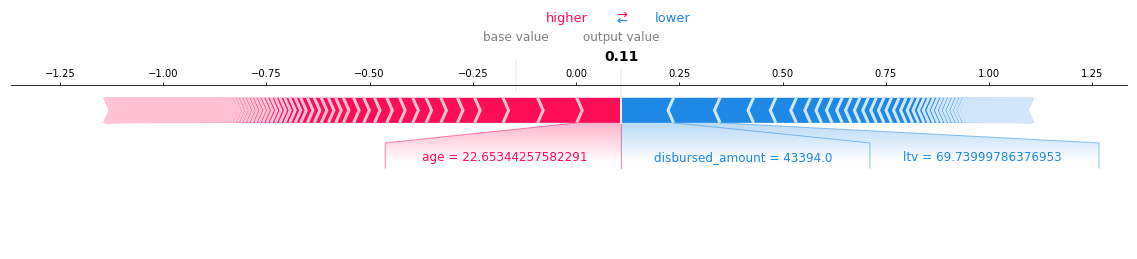

In [0]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:],matplotlib=True)

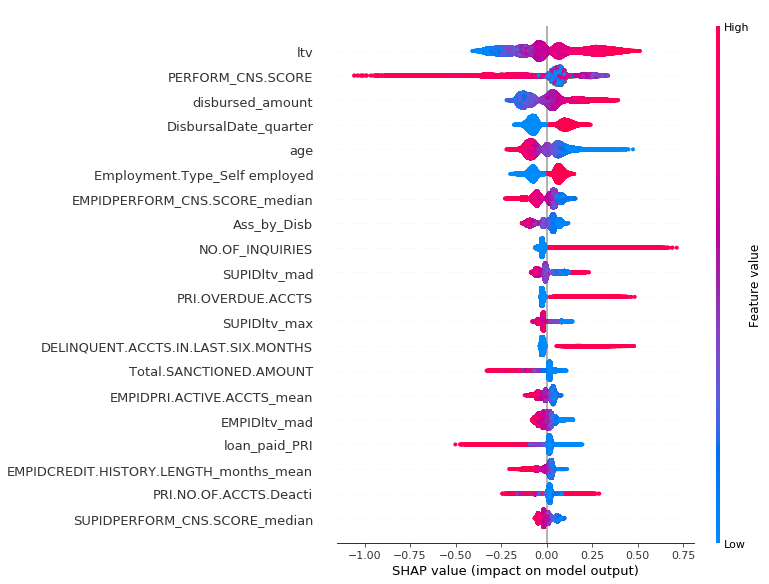

In [0]:
shap.summary_plot(shap_values, X)

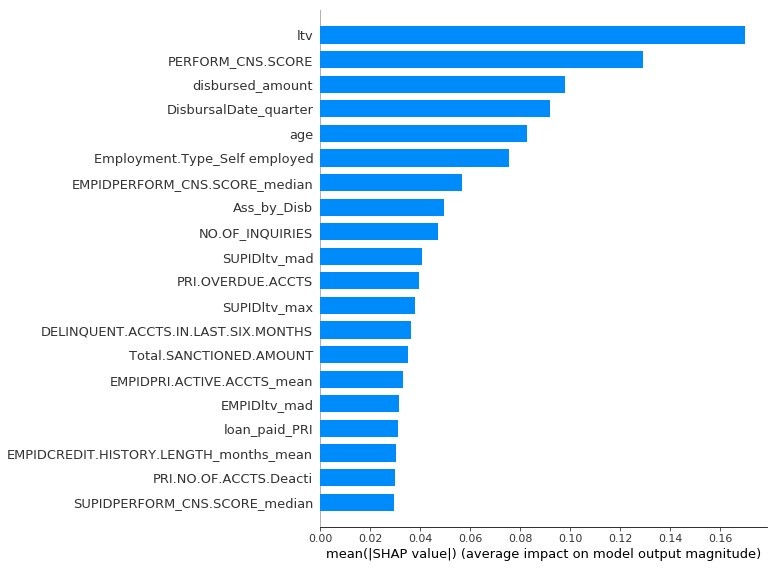

In [0]:
shap.summary_plot(shap_values, X, plot_type="bar")

## Submission

In [0]:
sub = pd.read_csv("../content/sample_submission_24jSKY6.csv")

In [0]:
sub['loan_default']=pred_test

In [0]:
#Sub 8 - Removed Embeddings and inlcuded all features with State ID and Branch ID as one hot endcoding - 0.652 which is less
#Sub 9 : Included aggrigate functions without hyper parameters tuning
#Sub 12 : 18/04 Night 4 AM
#Sub 13 : Apr 19, 2019, 10:33:13 AM
#Sub 14 : branch id and state ID removed
#Sub 17 : Some new features
#Sub 21 : Trial after removing date colms
sub.to_csv("BaselineSub_LGB21.csv",index=False)

## Lets try XG Booster

In [0]:
import xgboost

In [0]:
def run_xgb(X_train, X_test, y_train, y_test, test_df_lgb):
    params = {'objective': 'binary:logistic', 
              'booster' : "gbtree",
              'eval_metric':'auc',
              'eta': 0.04,
              'max_depth': 5, 
              'subsample': 0.9500000000000001, #changed from 0.6
              'colsample_bytree': 0.65,
              'lambda':0.3,
              'gamma':0.6,
              'max_delta_step':3,
              'min_child_weight':2.0,
              #'alpha':0.001,
              'random_state': 42,
              'scale_pos_weight':5.6,
              'max_bin':425, #changed from 450
              'silent': True}
    
    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_test, y_test)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 271, watchlist, maximize=False, early_stopping_rounds = 10, verbose_eval=10)
    
    #cv = xgb.cv(params, tr_data, 271, nfold=5, early_stopping_rounds=10, verbose_eval=10)
    
    dtest = xgb.DMatrix(test_df_lgb)
    xgb_pred_y = model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit)
    
    return xgb_pred_y, model_xgb

In [0]:
# Training XGB
pred_test_xgb, model_xgb = run_xgb(X_train, X_test, y_train, y_test, test)
print("XGB Training Completed...")

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.628165	valid-auc:0.619302
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 10 rounds.
[10]	train-auc:0.649635	valid-auc:0.641629
[20]	train-auc:0.657447	valid-auc:0.6479
[30]	train-auc:0.662972	valid-auc:0.651651
[40]	train-auc:0.668452	valid-auc:0.655048
[50]	train-auc:0.672525	valid-auc:0.657324
[60]	train-auc:0.67677	valid-auc:0.659763
[70]	train-auc:0.680622	valid-auc:0.661843
[80]	train-auc:0.683818	valid-auc:0.663243
[90]	train-auc:0.68671	valid-auc:0.664414
[100]	train-auc:0.689245	valid-auc:0.665234
[110]	train-auc:0.691636	valid-auc:0.665945
[120]	train-auc:0.693937	valid-auc:0.666664
[130]	train-auc:0.696039	valid-auc:0.667241
[140]	train-auc:0.698017	valid-auc:0.668001
[150]	train-auc:0.699874	valid-auc:0.668579
[160]	train-auc:0.701589	valid-auc:0.668949
[170]	train-auc:0.703535	valid-auc:0.669271
[180]	train-auc:0.705353	valid-auc:0.66979
[190]	train-auc:0.706916	valid-auc:0.

In [0]:
dtest1 = xgb.DMatrix(X_test)
y_pred_X = model_xgb.predict(dtest1)

In [0]:
confusion_matrix(y_test,y_pred_X.round())


# Things tried not included here


## 1.  I tried to create entity embeddings for Branch , Employee , and Pin code but had less feature importance
## 2.   Final output was 50% weights of XGB and Light GBM
##  3.   As i have seen many has used CatBooster which i never tried (I tot to try once :) )
##  4.   LB Public Score was 66.33161621 
##  5.   LB Private Score was 66.63983292
